# AutoGluon Model

In [1]:
%pip install -U pip
%pip install -U setuptools wheel
%pip install autogluon scikit-learn

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ---------------------------------------- 0.0/863.4 kB ? eta -:--:--
   - -------------------------------------- 30.7/863.4 kB 1.3 MB/s eta 0:00:01
   ------------------- -------------------- 430.1/863.4 kB 6.8 MB/s eta 0:00:01
   ---------------------------------------- 863.4/863.4 kB 9.1 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 60.2.0
    Uninstalling setuptools-60.2.0:
      Successfully uninstalled setuptools-60.2.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
openxlab 0.1.0 requires setuptools~=60.2.0, but you have setuptools 70.0.0 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ---------------------------------------- 0.0/953.1 kB ? eta -:--:--
    --------------------------------------- 20.5/953.1 kB ? eta -:--:--
   ---------------------- ----------------- 542.7/953.1 kB 8.5 MB/s eta 0:00:01
   --------------------------------------- 953.1/953.1 kB 11.9 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 70.0.0
    Uninstalling setuptools-70.0.0:
      Successfully uninstalled setuptools-70.0.0
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

dataset_path = "../Dataset/Thyroid_Disease_Data.csv"
data = pd.read_csv(dataset_path)

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42) 

train_data.to_csv("../Dataset/final_train.csv", index=False)
test_data.to_csv("../Dataset/final_test.csv", index=False)

In [3]:
from autogluon.tabular import TabularDataset, TabularPredictor

data_root = '../Dataset/'
train_data = TabularDataset(data_root + 'final_train.csv')
test_data = TabularDataset(data_root + 'final_test.csv')

predictor = TabularPredictor(label='Recurred').fit(train_data=train_data)
predictions = predictor.predict(test_data)

c:\Users\arpit\Desktop\dl\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
No path specified. Models will be saved in: "AutogluonModels\ag-20240601_060303"
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels

In [4]:
model = TabularPredictor.load("AutogluonModels/ag-20240601_040114")
test_data = TabularDataset(data_root + 'final_test.csv')

model.predict(test_data)

Loaded data from: ../Dataset/test.csv | Columns = 17 / 17 | Rows = 77 -> 77


0      No
1      No
2     Yes
3      No
4      No
     ... 
72     No
73     No
74     No
75    Yes
76    Yes
Name: Recurred, Length: 77, dtype: object

WeightedEnsemble_L2 Validation score: 0.9839

---

# MLP Model

In [ ]:
%pip install keras tensorflow

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
data = pd.read_csv('../Dataset/Thyroid_Disease_Data.csv')

X = data.drop('Recurred', axis=1)
y = data['Recurred']

In [ ]:
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)

In [ ]:
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=[np.number]).columns

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

X = preprocessor.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy*100:.2f}%')

Epoch 1/50


c:\Users\arpit\Desktop\dl\env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.6701 - loss: 0.6454 - val_accuracy: 0.7792 - val_loss: 0.4609
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7309 - loss: 0.5432 - val_accuracy: 0.8052 - val_loss: 0.4042
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7882 - loss: 0.4812 - val_accuracy: 0.8312 - val_loss: 0.3658
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7464 - loss: 0.4787 - val_accuracy: 0.8571 - val_loss: 0.3314
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8045 - loss: 0.4216 - val_accuracy: 0.8831 - val_loss: 0.3007
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8582 - loss: 0.3996 - val_accuracy: 0.8701 - val_loss: 0.2707
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8293 - loss: 0.3780 - val_accuracy: 0.8701 - val_loss: 0.2474
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8472 - loss: 0.3721 - val_accuracy: 0.8831 - val_loss: 0.2252
Ep

In [ ]:
model.save("MLPModel/model.h5")

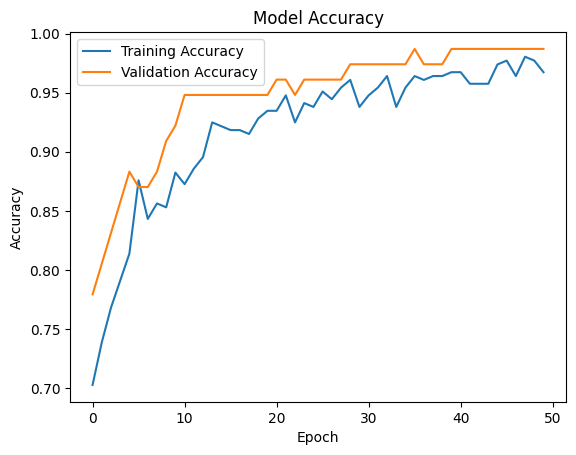

In [ ]:
import matplotlib.pyplot as plt 
    
accuracy_history = history.history['accuracy']
val_accuracy_history = history.history['val_accuracy']

plt.plot(accuracy_history, label='Training Accuracy')
plt.plot(val_accuracy_history, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

MLP Accuracy: 0.9870

---

# TabNet Model

In [ ]:
%pip install pytorch-tabnet scikit-learn pandas

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
data = pd.read_csv('../Dataset/Thyroid_Disease_Data.csv')

X = data.drop('Recurred', axis=1)
y = data['Recurred']

if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)

categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=[np.number]).columns

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

X = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from pytorch_tabnet.tab_model import TabNetClassifier
import torch

tabnet_clf = TabNetClassifier(optimizer_fn=torch.optim.Adam,
                              optimizer_params=dict(lr=2e-2),
                              scheduler_params={"step_size":10, "gamma":0.9},
                              scheduler_fn=torch.optim.lr_scheduler.StepLR, 
                              mask_type='sparsemax')  # "sparsemax" or "entmax" are the options

tabnet_clf.fit(
    X_train=X_train, y_train=y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    eval_name=['train', 'valid'],
    eval_metric=['accuracy'],
    max_epochs=100, patience=20,
    batch_size=1024, virtual_batch_size=128,
    num_workers=0,
    drop_last=False
)

saving_path_name = "./TabNetModel/tabnet_model.pth"
tabnet_clf.save_model(saving_path_name)

epoch 0  | loss: 0.86117 | train_accuracy: 0.64052 | valid_accuracy: 0.66234 |  0:00:00s


c:\Users\arpit\Desktop\dl\env\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 1  | loss: 0.80141 | train_accuracy: 0.70588 | valid_accuracy: 0.75325 |  0:00:00s
epoch 2  | loss: 0.66793 | train_accuracy: 0.71569 | valid_accuracy: 0.75325 |  0:00:00s
epoch 3  | loss: 0.63027 | train_accuracy: 0.71242 | valid_accuracy: 0.75325 |  0:00:00s
epoch 4  | loss: 0.62346 | train_accuracy: 0.70915 | valid_accuracy: 0.75325 |  0:00:00s
epoch 5  | loss: 0.5593  | train_accuracy: 0.70915 | valid_accuracy: 0.75325 |  0:00:00s
epoch 6  | loss: 0.51439 | train_accuracy: 0.70915 | valid_accuracy: 0.75325 |  0:00:00s
epoch 7  | loss: 0.47156 | train_accuracy: 0.70915 | valid_accuracy: 0.75325 |  0:00:00s
epoch 8  | loss: 0.43915 | train_accuracy: 0.70915 | valid_accuracy: 0.75325 |  0:00:00s
epoch 9  | loss: 0.44085 | train_accuracy: 0.70915 | valid_accuracy: 0.75325 |  0:00:00s
epoch 10 | loss: 0.40845 | train_accuracy: 0.70915 | valid_accuracy: 0.75325 |  0:00:00s
epoch 11 | loss: 0.3848  | train_accuracy: 0.70915 | valid_accuracy: 0.75325 |  0:00:00s
epoch 12 | loss: 0.35

c:\Users\arpit\Desktop\dl\env\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


'./TabNetModel/tabnet_model.pth.zip'

In [ ]:
preds = tabnet_clf.predict(X_test)

accuracy = (preds == y_test).mean()
print(f'Accuracy: {accuracy*100:.2f}%')

Accuracy: 96.10%


TabNet Accuracy: 0.9610